In [2]:
import obspy
import matplotlib.pyplot as plt #imports
from obspy import UTCDateTime

In [3]:
st = obspy.read(r"C:\Users\wille\Mars-Seismology-Undergraduate-Research-Project\InSight-seismic-data-downloader\DATA\BROADBAND\A\S0864a\S0864a_VEL.mseed")

In [4]:
st.filter("bandpass", freqmin=0.1, freqmax=0.8, corners=4, zerophase=False)

3 Trace(s) in Stream:
XB.ELYSE.02.BHZ | 2021-05-02T00:27:35.371000Z - 2021-05-02T02:27:35.321000Z | 20.0 Hz, 144000 samples
XB.ELYSE.02.BHN | 2021-05-02T00:27:35.370000Z - 2021-05-02T02:27:35.320000Z | 20.0 Hz, 144000 samples
XB.ELYSE.02.BHE | 2021-05-02T00:27:35.370000Z - 2021-05-02T02:27:35.320000Z | 20.0 Hz, 144000 samples

In [5]:
from obspy.taup import TauPyModel
mars_mod = TauPyModel("TAYAK_modified")
arrivals = mars_mod.get_travel_times(source_depth_in_km=58.9, distance_in_degree=28.7, phase_list=["ttall"])
print(arrivals)

16 arrivals
	P phase arrival at 226.497 seconds
	pP phase arrival at 242.324 seconds
	PP phase arrival at 246.032 seconds
	PP phase arrival at 246.135 seconds
	PP phase arrival at 246.176 seconds
	sP phase arrival at 252.217 seconds
	S phase arrival at 403.212 seconds
	SP phase arrival at 405.769 seconds
	sS phase arrival at 427.578 seconds
	SS phase arrival at 428.297 seconds
	PP phase arrival at 2234.557 seconds
	SP phase arrival at 2403.038 seconds
	PS phase arrival at 2411.370 seconds
	SP phase arrival at 2425.685 seconds
	PS phase arrival at 2434.201 seconds
	SS phase arrival at 2739.901 seconds


(-5e-09, 5e-09)

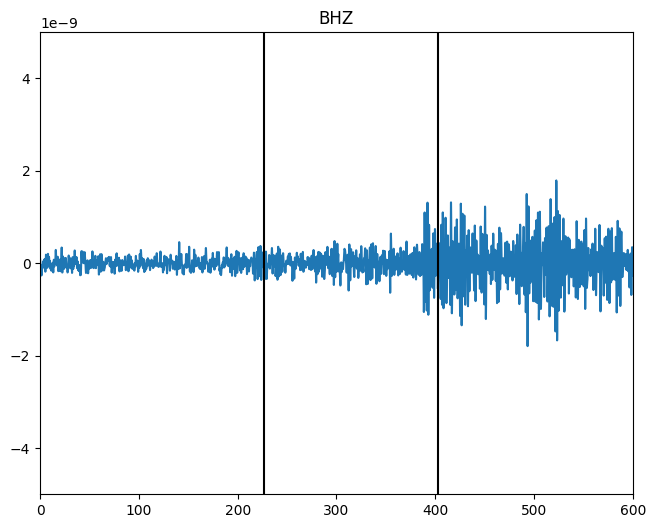

In [6]:
trz = st.select(channel="BHZ")[0]
trn = st.select(channel="BHN")[0]
tre = st.select(channel="BHE")[0]
origin_time = 60*30
p_predicted = 226.497
s_predicted = 403.212
time_for_trz = trz.times() - origin_time
time_for_trn = trn.times() - origin_time
time_for_tre = tre.times() - origin_time

plt.figure(figsize=(26, 6))
plt.subplot(131)
plt.plot(time_for_trz, trz.data)
plt.title("BHZ")
plt.axvline(p_predicted, c="black")
plt.axvline(s_predicted, c="black")
plt.xlim(0,600)
plt.ylim(-5e-9,5e-9)

(-5e-09, 5e-09)

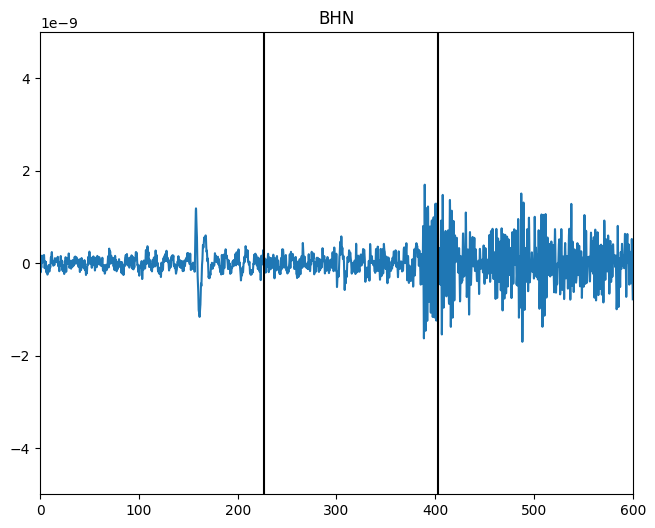

In [7]:
plt.figure(figsize=(26, 6))
plt.subplot(132)
plt.plot(time_for_trn, trn.data)
plt.title("BHN")
plt.axvline(p_predicted, c="black")
plt.axvline(s_predicted, c="black")
plt.xlim(0,600)
plt.ylim(-5e-9,5e-9) #spectrogram can pick up wave arrivals like p when energy comes in that may not be seen in seismic plot

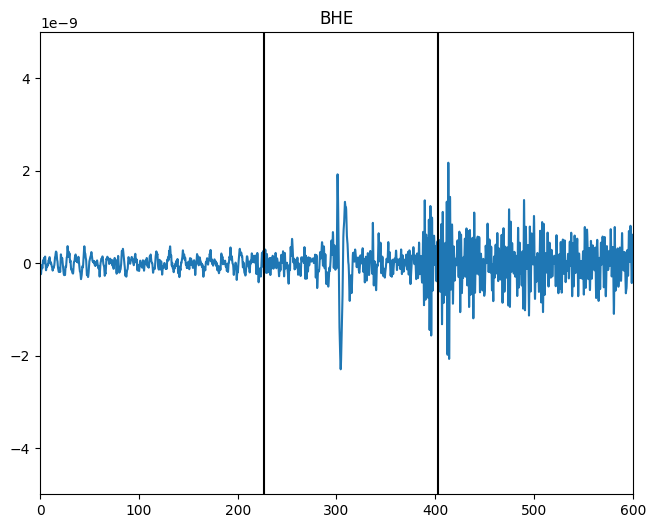

In [8]:
plt.figure(figsize=(26, 6))
plt.subplot(133)
plt.plot(time_for_tre, tre.data)
plt.title("BHE")
plt.xlim(0,600)
plt.ylim(-5e-9,5e-9)
plt.axvline(p_predicted, c="black")
plt.axvline(s_predicted, c="black")